# Сборный проект

## Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру
компьютерные игры. Из открытых источников доступны исторические данные о
продажах игр, оценки пользователей и экспертов, жанры и платформы
(например, Xbox или PlayStation). Вам нужно выявить определяющие успешность
игры закономерности. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы
планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.
Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же
2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating
Board) — это ассоциация, определяющая возрастной рейтинг компьютерных
игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную
категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для
подростков»

## Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software RatingBoard). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


# Шаг 1. Изучение и знакомство с данными <a class="anchor" id="first-bullet"></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
from scipy import stats as st
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
try: 
    df = pd.read_csv('C:/Users/Danila30/Downloads/GitHub/Сборный проект 1/games.csv')
    
except:
    df = pd.read_csv('/datasets/games.csv')
   
    

In [3]:
#cнижает размерность чисел для вывода на экран на всем проекте и помогает с экспоненциальной записью чисел
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
display(df.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
# Просмотрим общую информацию о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Практически во всех столбцах либо нету пропусков, либо их мало. Исключением является только оценки критиков и пользователей. В столбцах с малым количеством пропусков - данные пропуски можно оценить как неявные, при необходимости можно будет заменить на 0 или вообще оставить без изменений, на анализ они влияют незначительно!

In [6]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


In [7]:
print('Количество пропусков: {}'.format(df.isna().sum()))
print('Количество дубликатов: {}'.format(df.duplicated().sum()))

Количество пропусков: Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64
Количество дубликатов: 0


В столбцах critic_score, user_score, rating  больше всего пропусков, можно предроложить, чем игра позже выпускалась, тем больше вероятность что в данных столбцах будут пропуски. Иными словами пропуски возникают из-за того, что до кого-то периода игры не оценивали критики и пользователи, а так же не было специального возрастного рейтинга. В дальнейшем анализе если будет необходимо можно будет узнать, когда это начало появляться! Явных дубликатов не выявлено!

In [8]:
# Заменим пропуски в столбце Rating на undefined, теперь будет понятно, что игра без рейтинга
df['Rating']=df['Rating'].fillna('undefined')
df.head()    

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined


In [9]:
# посмотрим какие платформы представлены в таблице и есть ли неявные дубликаты
df['Platform'].value_counts()

Platform
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

In [10]:
# посмотрим какие жанры представлены в таблице и есть ли неявные дубликаты
df['Genre'].value_counts()

Genre
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: count, dtype: int64

In [11]:
# посмотрим какие года представлены в таблице и есть ли неявные дубликаты
df['Year_of_Release'].value_counts(ascending=True)

Year_of_Release
1,980.00       9
1,985.00      14
1,984.00      14
1,988.00      15
1,987.00      16
1,990.00      16
1,983.00      17
1,989.00      17
1,986.00      21
1,982.00      36
1,991.00      41
1,992.00      43
1,981.00      46
1,993.00      62
1,994.00     121
1,995.00     219
1,996.00     263
1,997.00     289
1,999.00     338
2,000.00     350
1,998.00     379
2,001.00     482
2,016.00     502
2,013.00     544
2,014.00     581
2,015.00     606
2,012.00     653
2,004.00     762
2,003.00     775
2,002.00     829
2,005.00     939
2,006.00    1006
2,011.00    1136
2,007.00    1197
2,010.00    1255
2,009.00    1426
2,008.00    1427
Name: count, dtype: int64

Неявных дубликатов не выявлено, однако с столбце 'year_of_release' имеется год '0' с 269 значениями.Иными словами неизвестна дата релиза игры она может быть какой угодно

## Вывод
После ознакомления с исходными данными в следующем шаге, необходимо предпринять обработку данных:
- Необходимо привести название столбцов к нижнему регистру;
- По возможности избавиться от пропусков;
- Привести данные к нужным типа (например, столбец year_of_release к типу int)

# Шаг 2. Предобработка данных

## Замена названий столбцов (приведение к нижнему регистру)

Приведём названия столбцов к нижнему регистру

In [12]:
df.columns = df.columns.str.lower()
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined


## Преобразование данных к нужным типам и Обработка пропущенных значений

In [13]:
df.sample(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
588,Streets of Rage,GEN,"1,990.00",Action,1.86,0.55,0.11,0.08,NaN,NaN,undefined
16680,Kyoukai no Shirayuki,PSV,"2,016.00",Action,0.00,0.00,0.01,0.00,NaN,NaN,undefined
10604,Bee Movie Game,PS2,"2,007.00",Action,0.05,0.04,0.00,0.01,65.00,7.5,E
8789,WordJong,DS,"2,007.00",Puzzle,0.13,0.01,0.00,0.01,77.00,7.7,E
7601,San Francisco Rush 2049,N64,"2,000.00",Racing,0.16,0.04,0.00,0.00,NaN,NaN,undefined
414,True Crime: Streets of LA,PS2,"2,003.00",Action,1.89,1.05,0.02,0.31,77.00,8,M
4493,Deadpool,X360,"2,013.00",Action,0.26,0.13,0.00,0.04,62.00,7.4,M
13765,NBA In The Zone '99,N64,"1,998.00",Sports,0.04,0.00,0.00,0.00,NaN,NaN,undefined
3684,NHL 14,PS3,"2,013.00",Sports,0.28,0.17,0.00,0.09,80.00,6,E10+
4629,International Superstar Soccer Pro '98,PS,"1,998.00",Sports,0.02,0.02,0.35,0.03,NaN,NaN,undefined


In [17]:
df['year_of_release'] = df['year_of_release'].fillna(0).astype(int)
#df['year_of_release'] = df['year_of_release'].astype(int)

Заменим тип данных в year_of_release на int, сначала избавимся отпропусков заменой на 0, затем изменим тип данных. Теперь за 0 будем считать другой год выхода игры(неизвестный), т.к. узнать в какой именно год вышла игра не получится!

In [18]:
# проверим данный столбец
df['user_score'].describe()

count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

В данном столбце 96 уникальных значений типа object из них самое популяное 'tbd' - это аббревиатура означает отсутствие значений (NaN)! Необходимо заменить 'tbd' на NaN, затем поменять типа данных на float.

In [19]:
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype(float)
display(df['user_score'].head(10))
#df['user_score'] = df['user_score']
#genre_mean = df.groupby('genre').agg({'user_score':np.mean})
#df['user_score'] = df.groupby('genre', sort=False)['user_score'].apply(lambda x: x.fillna(x.mean()))
#print(df.groupby('genre').agg({'user_score':np.mean}))

0   8.00
1    NaN
2   8.30
3   8.00
4    NaN
5    NaN
6   8.50
7   6.60
8   8.40
9    NaN
Name: user_score, dtype: float64

## Подсчёт суммарных продаж во всех регионах 

In [20]:
# Сложим продажи по каждому региону для каждой игры
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


В итоге получили новую таблицу добавив новый столбец сумму продаж по всем регионам для каждой игры

## Вывод
После предобработки данных стало понятно, что столбцы с рейтингом кртитиков, оценками пользователей и возрастным рейтингом заменить на корректные и адекватные значения невозможно. В дальнейшем анализе при необходимости возможна замена пропусков на 0 или другое альтернативное значение, которое не будет учитываться в анализе но поможет производить разлияные расчёты (т.к. NaN этому будет мешать).

# Шаг 3. Исследовательский анализ данных

## Сколько игр выпускалось в разные годы

Построим линейный график, который наглядно покажет динамику изменения выпуска игр отдельно за каждый год

Text(0.5, 1.0, 'Количество выпускаемых игр за каждый год')

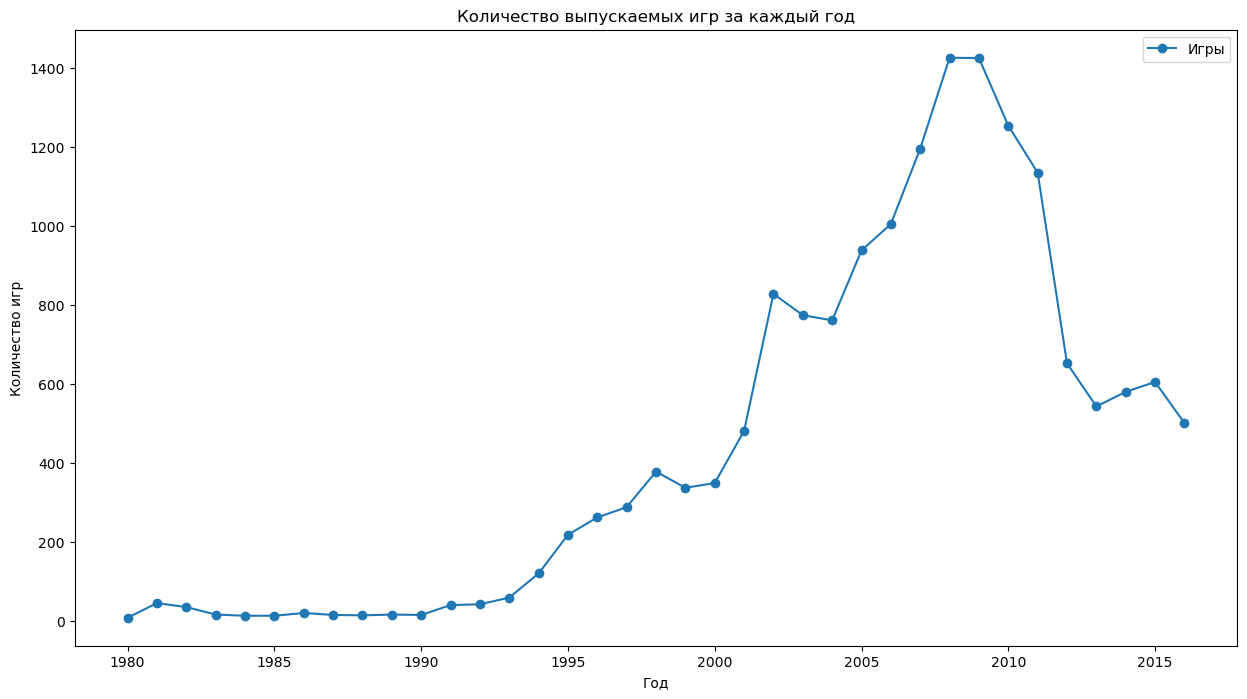

In [21]:
# создадим таблицу
df_release = df.groupby('year_of_release').count().reset_index()

# удалим первую строку с неизвестной датой релиза игры
df_release.drop(labels = [0],axis = 0, inplace = True)

fig, ax = plt.subplots(figsize=(15, 8))
df_release.plot(style = 'o-', y = 'name', x ='year_of_release', label='Игры', ax=ax)
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.title("Количество выпускаемых игр за каждый год")

### Вывод
На графике видно, что до 1992 года количество выпускаемых игр практически не изменялось. Начиная с 1993 до 2009 года наблюдается динамика роста выпускаемых игр. После 2009 происходит спад и уровень выпуска возвращается к 2001 году - это может быть связано с улучшением качества игр (возрастает бюджет и время на разработку игр), ещё может влиять популяризации игр на телефоне. На первый взгляд данные до 2001 года уже не так важны!(К данному вопросу лучше вернуться немного позже)

## Как менялись продажи по платформам. Какие платформы лидируют по продажам, растут или падают?

Необходимо выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. Узнать за какой характерный срок появляются новые и исчезают старые платформы. Выберать несколько потенциально прибыльных платформ.



Text(0.5, 1.0, 'Продажи по платформам за все года')

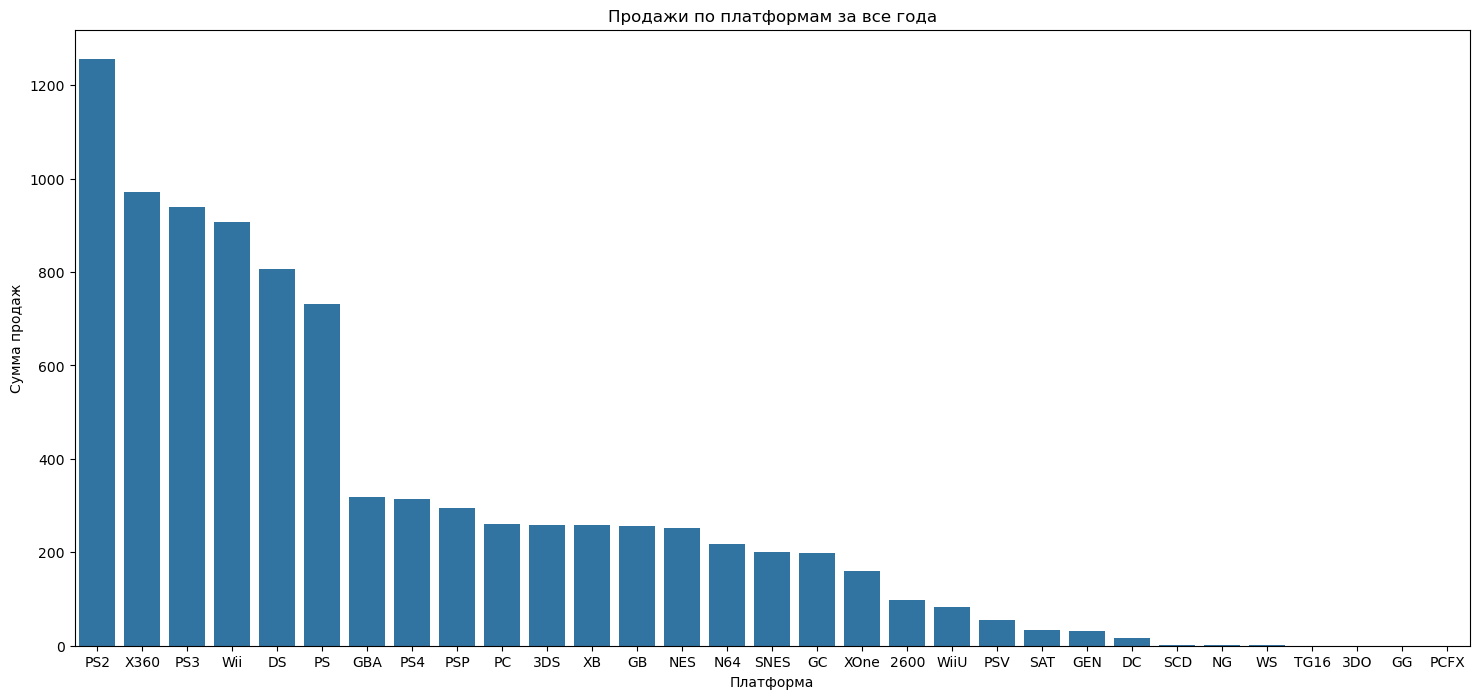

In [22]:
# создадим сводную таблицу за все года по названию платформы и дохода (суммы продаж)

platform_top_sales = df.pivot_table(
    index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False)
#platform_top_sales = platform_top_sales[(platform_top_sales['year_of_release'] > 2011)]
# построим (barplot) из библиотеки seaborn 
plt.figure(figsize=(18,8))
sns.barplot(x=platform_top_sales.index,y=platform_top_sales['sum_sales'])
plt.xlabel("Платформа")
plt.ylabel("Сумма продаж")
plt.title("Продажи по платформам за все года")

После построения столбчатой диаграммы можно с легкостью определить топ 5 платформ, которые принесли наибольший доход за все года. Далее необходимо посмотреть продажи за каждый год по топ 5 игровым платформамт начиная с 2001 года, когда количество выпускаемых игр ничинает резко расти!

In [23]:
# Напишем функцию, которая будет возвращать нужную сводную таблицу и выводить данные с 2001 года
def year_platform_sum_sale(name, data):
    piece = data[(data['platform'] == name) & (data['year_of_release'] >= 2001)]
    total = piece.pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total

In [24]:
# Создадим свою таблицу по платформам и их обшим продажам. отсортируем их по убыванию и оставим только топ 5.

top_platforms_5 = df[(df['year_of_release'] >= 2001)].pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False).head(5)
top_platforms_5 = top_platforms_5.reset_index().rename_axis(None, axis=1)


In [25]:
#Посмотрим топ 5 самых продаваемых платформ
top_platforms_5

,platform,sum_sales
0,PS2,"1,194.39"
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.76


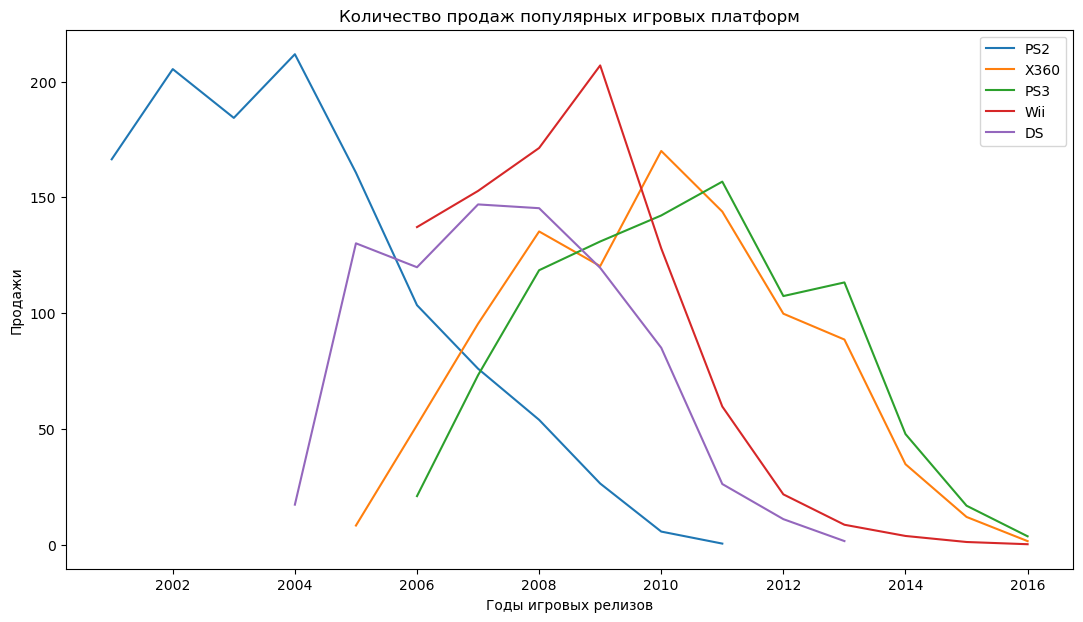

In [26]:
#Отрисуем все игровые платформы и их поведение за последние c 2001 года
plt.figure(figsize=(13,7))
plt.title('Количество продаж популярных игровых платформ')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')

for i in list(top_platforms_5['platform']):
    sns.lineplot(data=year_platform_sum_sale(i,df)['sum_sales'], label=i)
    plt.legend()

### Вывод

После построения линейного графика с суммой продаж отдельно для каждой из топ 5 платформ за каждый год, можно сказать следующее:
- У всех платформ есть период жизни: PS2 - более 10 лет, X360 - 11 лет, PS3 - 10 лет, Wii - 11 лет, DS - 9 лет;
- У всех платформ есть период активного роста по количеству вуручки: PS2 - до 2004 года, X360 - с 2006 по 2010 год, PS3 - с 2006 по 2011 год, Wii с 2006 по 2009 год, DS - с 2004 по 2007 год.

In [27]:
(4+5+3+3)/4

3.75

Т.е. тот период, который находится за пределами активного роста (у платформы происходит спад по выручке) нас уже не так сильно интересует. Для дальнейшего анализа гораздо интереснее период роста, в среднем он составляет (3+5+3+4)/4 = 3.75 лет.

Поэтому необходимо рассмотреть более подробно топ 5 платформ по выручке за последнии 5 лет, для более детального анализа

## Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Возьмём данные по суммарным продажам топ 5 игровых платформ за последнии 5 лет

In [28]:
# Напишем функцию, которая будет возвращать нужную сводную таблицу и выводить данные с 2011 года
def year_platform_sum_sale_2011(name, data):
    piece = data[(data['platform'] == name) & (data['year_of_release'] >= 2011)]
    total = piece.pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total

In [29]:
# Создадим свою таблицу по платформам и их обшим продажам. отсортируем их по убыванию и оставим только топ 5.

top_platforms_5_2011 = df[(df['year_of_release'] >= 2011)].pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False).head(5)
top_platforms_5_2011 = top_platforms_5_2011.reset_index().rename_axis(None, axis=1)


In [30]:
#Посмотрим топ 5 самых продаваемых платформ за последние 5 лет
top_platforms_5_2011

,platform,sum_sales
0,PS3,445.57
1,X360,380.38
2,PS4,314.14
3,3DS,257.81
4,XOne,159.32


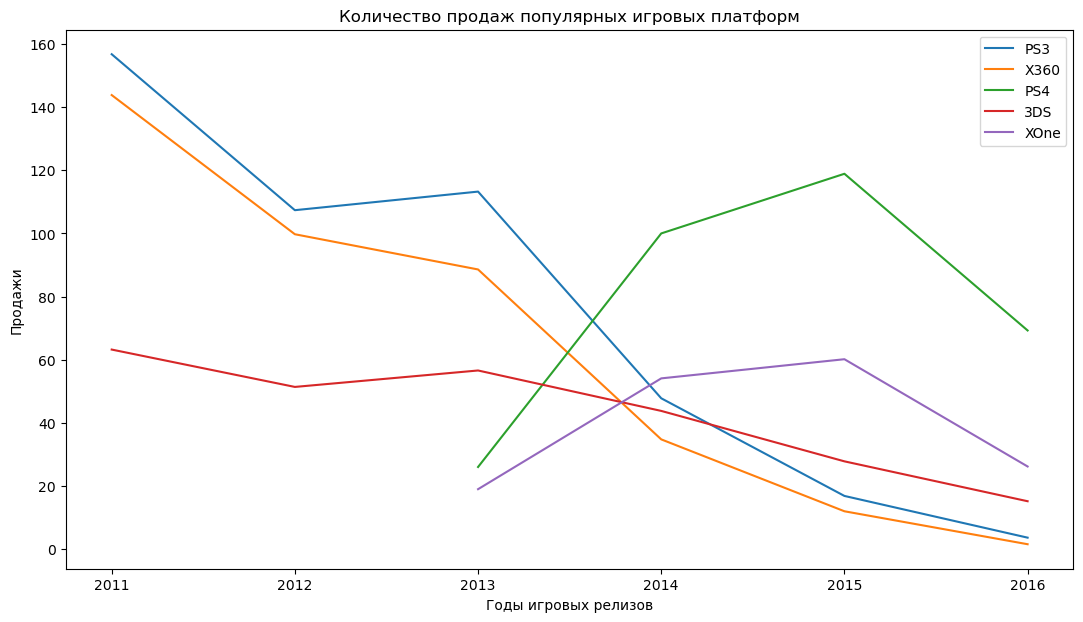

In [31]:
#Отрисуем топ 5  игровых платформ и их поведение за последние 5 лет
plt.figure(figsize=(13,7))
plt.title('Количество продаж популярных игровых платформ')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')

for i in list(top_platforms_5_2011['platform']):
    sns.lineplot(data=year_platform_sum_sale_2011(i,df)['sum_sales'], label=i)
    plt.legend()

### Вывод
В начале 2011 года PS3 и X360 были очень популярны и за последнии  5 лет имеют больше всего прибыли от продаж. В начале 2013 года вышли PS4 и XOne они значительно снизили спрос на своих предшественников. Стоит отметить, что старт по продажам у PS4 гораздо лучше, чем у XOne! На графике видно, что период активного роста новых популярных игровых платформ составляет 2 года. Однако, когда мы рассматривали более длительный период (с 2001 по 2016 год) - период активного роста в среднем составлял 3.75 лет - поэтому в дальнейшем анализе за актуальный период будем считать не 2 года и не 3.75 лет, возьмем 3 года с 2013 по 2016, т.к. данные за 2016 год могут быть неполные!

## Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

In [32]:
# Напишем функцию, которая будет возвращать нужную сводную таблицу и выводить данные с 2013 года
def year_platform_sum_sale_2013(name, data):
    piece = data[(data['platform'] == name) & (data['year_of_release'] >= 2013)]
    total = piece.pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total

In [33]:
# Создадим свою таблицу по платформам и их обшим продажам. отсортируем их по убыванию и оставим только топ 5.

top_platforms_5_2013 = df[(df['year_of_release'] >= 2013)].pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False).head(5)
top_platforms_5_2013 = top_platforms_5_2013.reset_index().rename_axis(None, axis=1)

In [34]:
top_platforms_5_2013

,platform,sum_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80


In [35]:
#Сохраним в переменной df_top_5_platforms топ 5 платформ
list_of_top5 = ['PS4','PS3','XOne','3DS','X360']
df_top_5_platforms_2013 = df[df['platform'].isin(['PS4','PS3','XOne','3DS','X360'])]
#df_top_5_platforms_2013 = df_top_5_platforms_2013[df_top_5_platforms_2013['sum_sales']<=1.3]

In [36]:
df_top_5_platforms_2013['sum_sales'].describe()

count   3,752.00
mean        0.70
std         1.48
min         0.00
25%         0.09
50%         0.24
75%         0.70
max        21.82
Name: sum_sales, dtype: float64

Text(0, 0.5, 'Глобальные продажи')

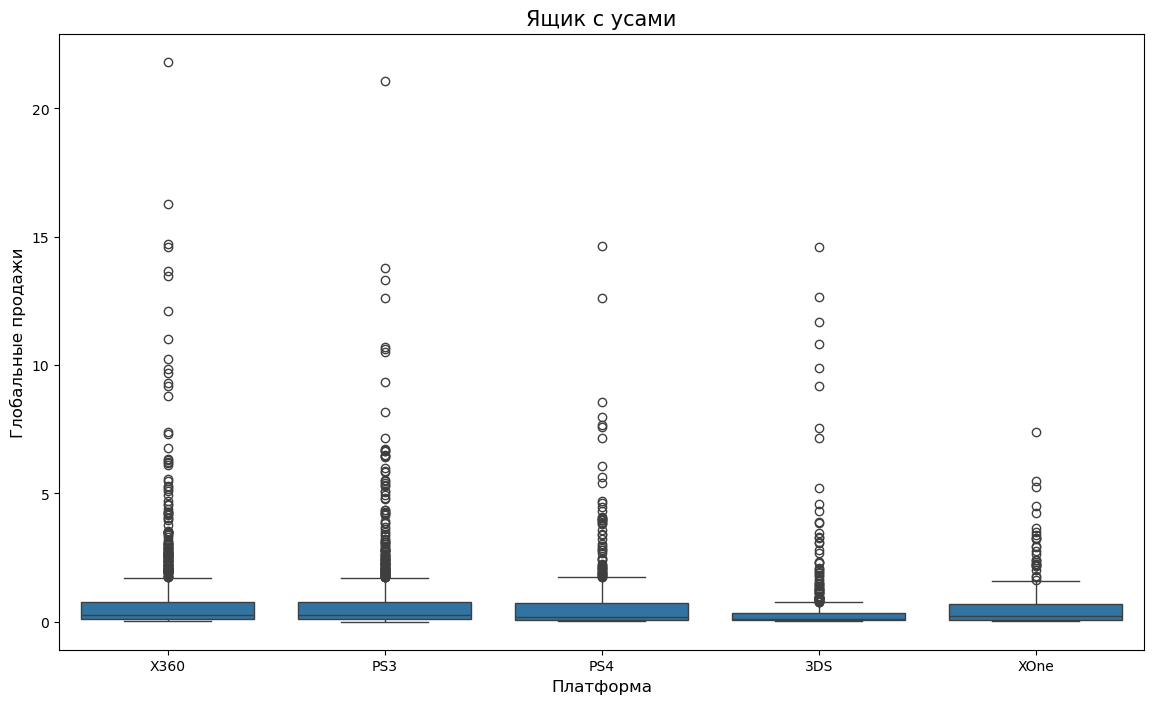

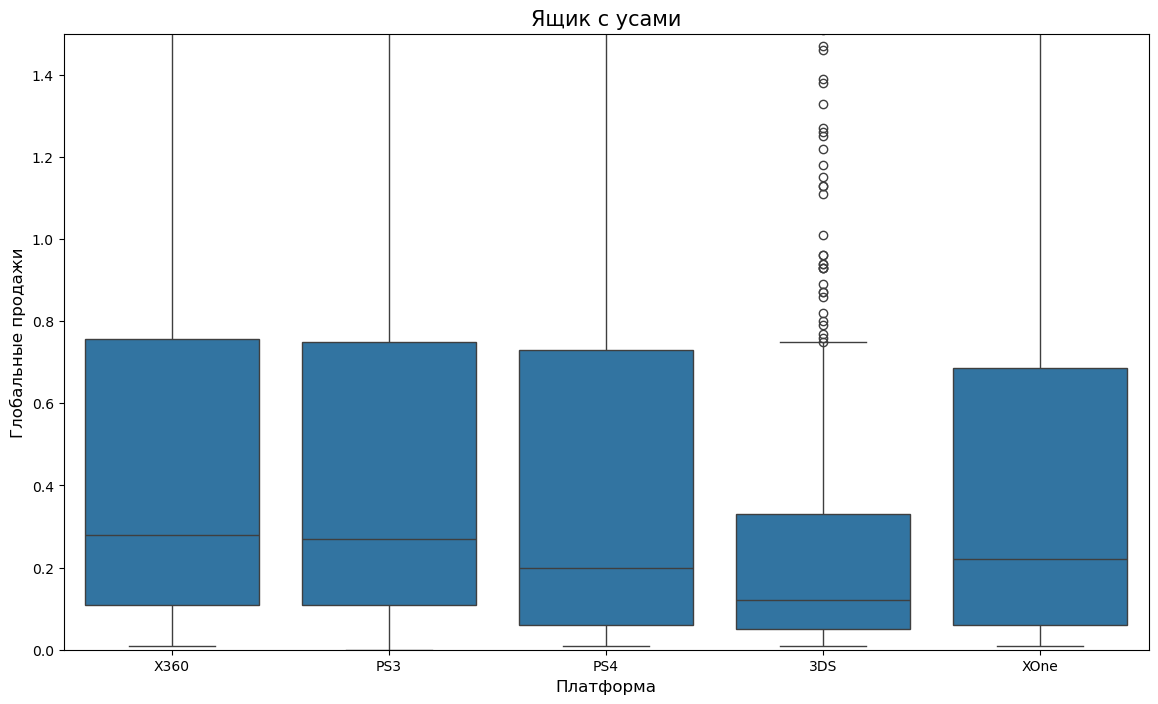

In [37]:
#Отрисуем ящики с усами 
plt.figure(figsize=(14,8))
sns.boxplot(data=df_top_5_platforms_2013, x='platform', y='sum_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

#Отрисуем ящики с усами c ограничением на оси Y
plt.figure(figsize=(14,8))
plt.ylim(0, 1.5)
sns.boxplot(data=df_top_5_platforms_2013, x='platform', y='sum_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

### Вывод: 
Для графиков был проведен срез по продажам на платформах с 2013 по 2016 года. 
- Исходя из графиков видно, что медиана протекает у всех по разному
- За данный период наибольшая сумма продаж PS4 за ним идут PS3 и XOne	

## Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. 

In [38]:
# посмотрим на корреляцию между оценками пользователей и продажами 
sony_play_station4 = df[(df['platform'] == 'PS4') & (df['year_of_release'] >= 2013)] 
sony_play_station4['user_score'].corr(sony_play_station4['sum_sales'])

-0.031957110204556424

Text(0.5, 1.0, 'Оценка пользователей')

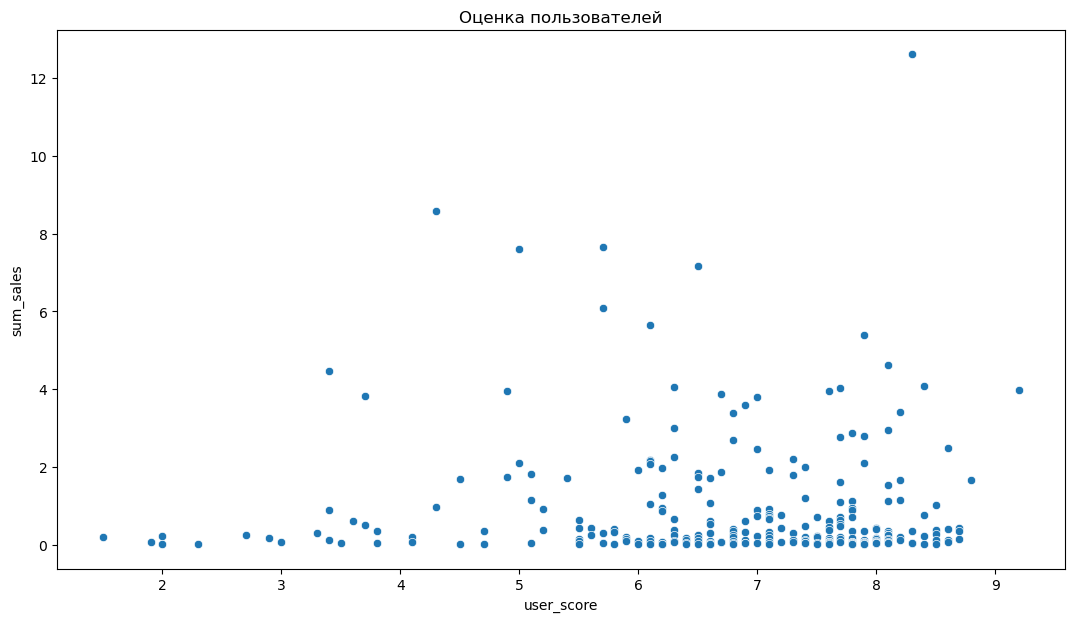

In [39]:
#Построим диаграмму рассеяния
plt.figure(figsize=(13,7))
sns.scatterplot(x='user_score', y='sum_sales', data=sony_play_station4)
plt.title('Оценка пользователей')

In [40]:
#Корреляция между оценкой критиков и продажам
sony_play_station4['critic_score'].corr(sony_play_station4['sum_sales'])

0.40656790206178095

Text(0.5, 1.0, 'Оценка критиков')

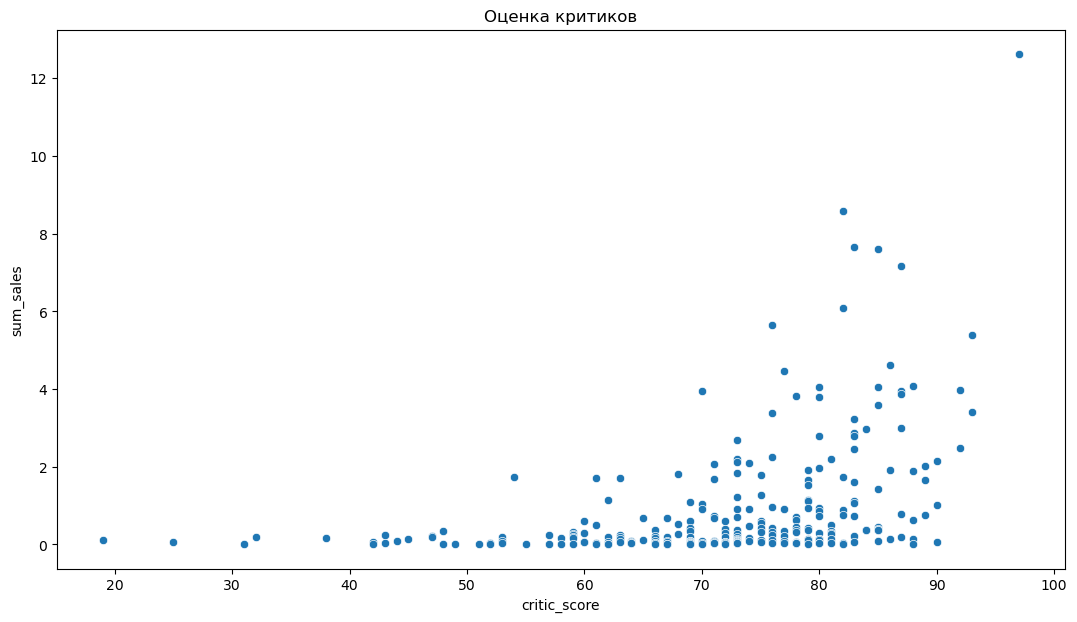

In [41]:
#Построим диаграмму рассеяния по оценкам критиков 
plt.figure(figsize=(13,7))
sns.scatterplot(x='critic_score', y='sum_sales', data=sony_play_station4)
plt.title('Оценка критиков')

### Вывод:
Отзывы критков в большей степени влияют на продажи. Грубо говоря, чем отзыв лучше, тем игру чаще покупают. Стоит отметить что корреляция и диаграмма рассеивания не показывает очень сильной зависимости. Однако слабая зависимость наблюдается в обоих случаях, но в случаии с критиками, гораздо выше (она стримиться к средней)!

## Соотнесем выводы с продажами игр на других платформах.

In [42]:
#Напишем функцию, которая будет отрисовывать диграммы рассеивания и считать корреляции
def corr_platform_score(name_of_platform):
    platform = df[(df['platform']==name_of_platform) & (df['year_of_release'] >= 2013)]
    fig, ax = plt.subplots(1 ,2, figsize=(13,4))
    sns.scatterplot(x='user_score', y='sum_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='sum_sales', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    correl = platform['user_score'].corr(platform['sum_sales'])
    critic_correl = platform['critic_score'].corr(platform['sum_sales'])
    
# Корреляция  critic_correl по модулю    
    if 0.3 > abs(critic_correl) >= 0:
        print('Корреляция между отзывами критиков и продажами на игровых платформах ', name_of_platform.upper(), ': Слабая или отсутствует', critic_correl)
    if 0.5 >= abs(critic_correl) >= 0.3:
        print('Корреляция между отзывами критиков и продажами на игровых платформах ', name_of_platform.upper(), ': Ниже средней', critic_correl)
    if 0.7 >= abs(critic_correl) >= 0.5:
        print('Корреляция между отзывами критиков и продажами на игровых платформах ', name_of_platform.upper(), ': Выше средней', critic_correl)
    if 0.9 >= abs(critic_correl) >= 0.7:
        print('Корреляция между отзывами критиков и продажами на игровых платформах ', name_of_platform.upper(), ': Высокая', critic_correl)
    if 1 >= abs(critic_correl) >= 0.9:
        print('Корреляция между отзывами критиков и продажами на игровых платформах ', name_of_platform.upper(), ': Сильная', critic_correl)

# Корреляция  correl  по модулю  
    if 0.3 > abs(correl) >= 0:
        print('Корреляция между отзывами пользователей и продажами на игровых платформах ', name_of_platform.upper(), ': Слабая или отсутствует', correl)
    if 0.5 >= abs(correl) >= 0.3:
        print('Корреляция между отзывами пользователей и продажами на игровых платформах ', name_of_platform.upper(), ': Ниже средней', correl)
    if 0.7 >= abs(correl) >= 0.5:
        print('Корреляция между отзывами пользователей и продажами на игровых платформах ', name_of_platform.upper(), ': Выше средней', correl)
    if 0.9 >= abs(correl) >= 0.7:
        print('Корреляция между отзывами пользователей ии продажами на игровых платформах ', name_of_platform.upper(), ': Высокая', correl)
    if 1 >= abs(correl) >= 0.9:
        print('Корреляция между отзывами пользователей и продажами на игровых платформах ', name_of_platform.upper(), ': Сильная', correl)
    print('\n')

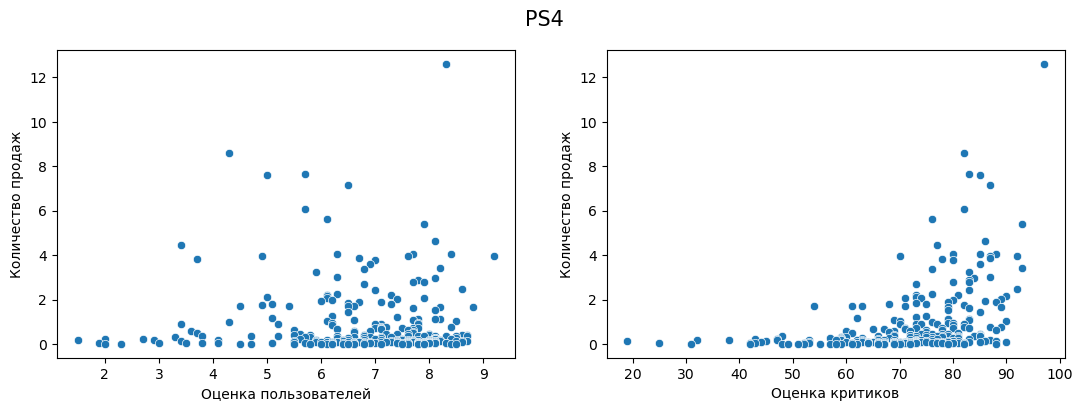

Корреляция между отзывами критиков и продажами на игровых платформах  PS4 : Ниже средней 0.40656790206178095
Корреляция между отзывами пользователей и продажами на игровых платформах  PS4 : Слабая или отсутствует -0.031957110204556424




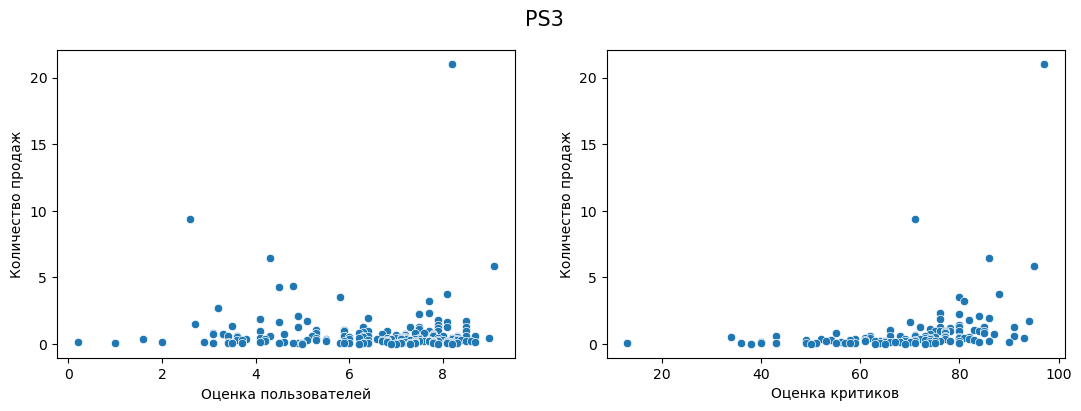

Корреляция между отзывами критиков и продажами на игровых платформах  PS3 : Ниже средней 0.3342853393371919
Корреляция между отзывами пользователей и продажами на игровых платформах  PS3 : Слабая или отсутствует 0.0023944027357566925




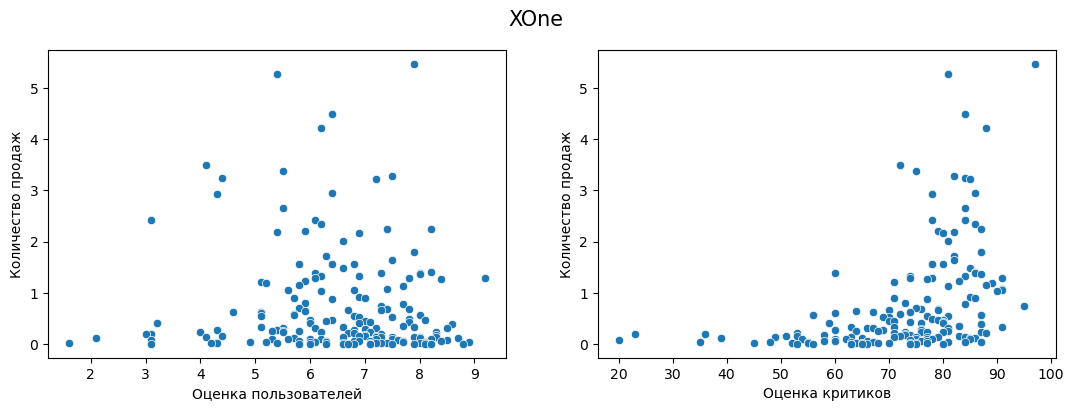

Корреляция между отзывами критиков и продажами на игровых платформах  XONE : Ниже средней 0.4169983280084017
Корреляция между отзывами пользователей и продажами на игровых платформах  XONE : Слабая или отсутствует -0.06892505328279414




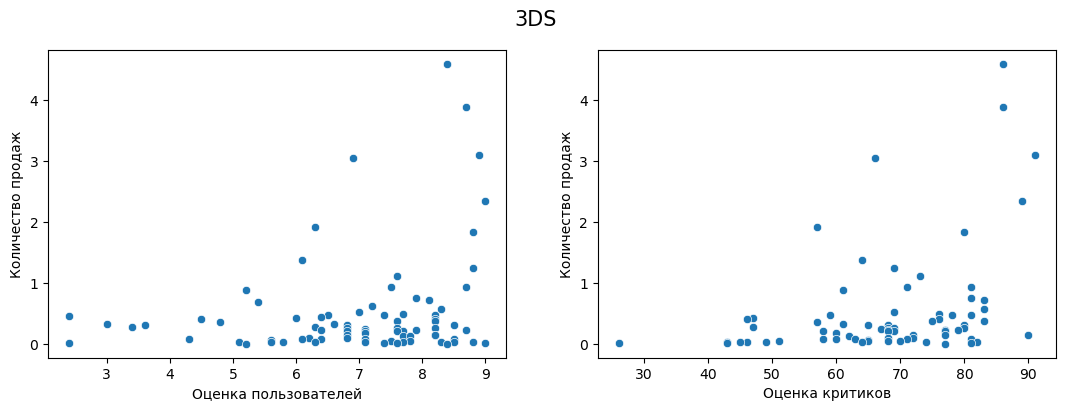

Корреляция между отзывами критиков и продажами на игровых платформах  3DS : Ниже средней 0.3570566142288103
Корреляция между отзывами пользователей и продажами на игровых платформах  3DS : Слабая или отсутствует 0.24150411773563016




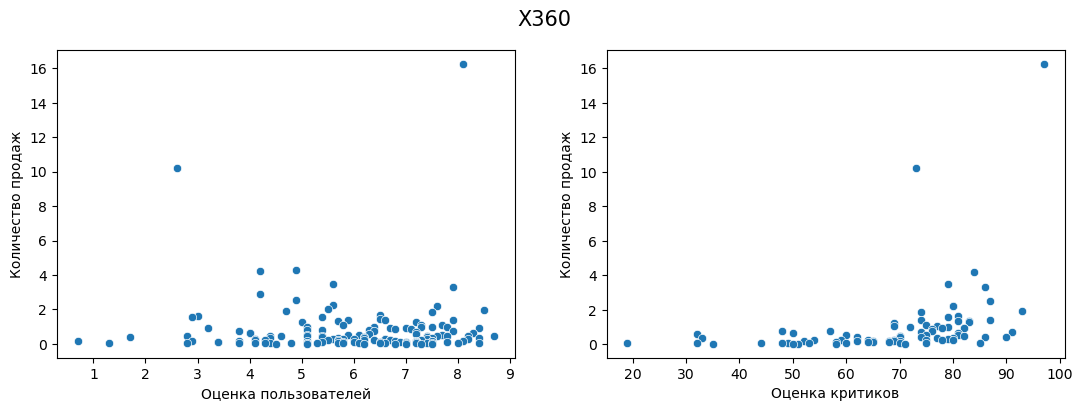

Корреляция между отзывами критиков и продажами на игровых платформах  X360 : Ниже средней 0.3503445460228664
Корреляция между отзывами пользователей и продажами на игровых платформах  X360 : Слабая или отсутствует -0.011742185147181342




In [43]:
#С помощью цикла выведем все 5 графиков
for platform in list_of_top5:
    corr_platform_score(platform)

### Вывод:
Практически у всех платформ присутствует почти средняя корреляция, между оценками критиков и продажами на платформах, чего нельзя сказать об оценке пользователей!

Оценка пользователей слабо влияет на продажи, в некоторых случаях вообще не влияет, чего не скажешь о оценке критиков. Пользователи больше доверяют отзывам критиков и чаще отдают предпочтении именно мнению критиков!

## Посмотрите на общее распределение игр по жанрам. 
Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


In [44]:
#С помощью сводных таблиц выведем жанры по сумме их продаж. Применим сортировку по убыванию. 
distr_genre = df[(df['year_of_release'] >= 2013)].pivot_table(
    index='genre', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False)
distr_genre = distr_genre.reset_index().rename_axis(None, axis=1)
distr_genre

,genre,sum_sales
0,Action,321.87
1,Shooter,232.98
2,Sports,150.65
3,Role-Playing,145.89
4,Misc,62.82
5,Platform,42.63
6,Racing,39.89
7,Fighting,35.31
8,Adventure,23.64
9,Simulation,21.76


Text(0, 0.5, 'Продажи')

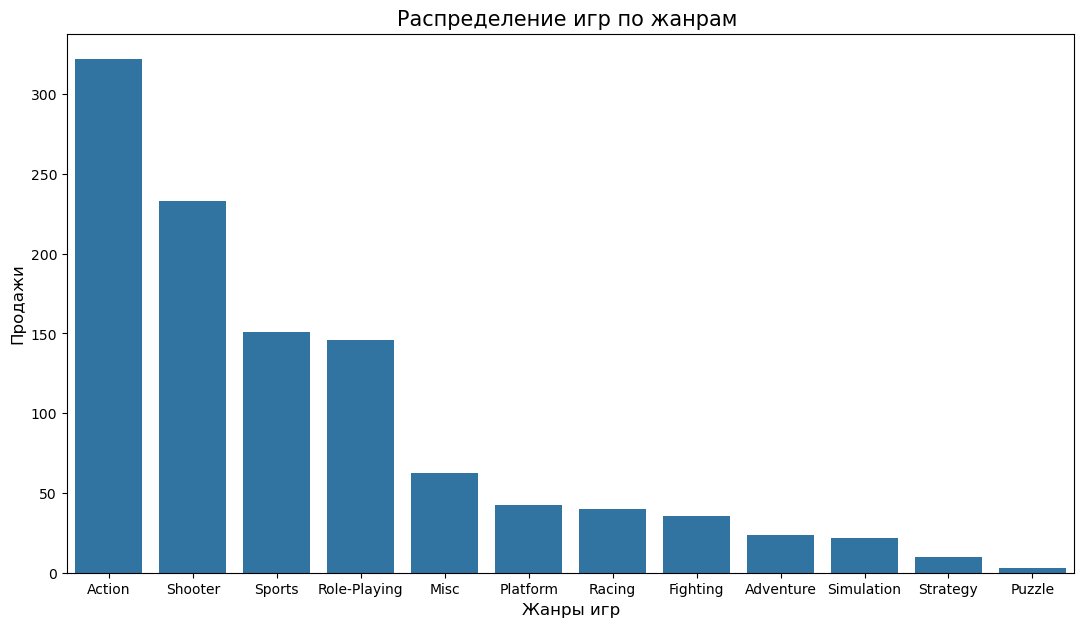

In [45]:
#Отрисуем барплот чтобы наглядно посмотреть какие жанры лидирует, а какие остаются внизу
plt.figure(figsize=(13,7))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=distr_genre, x='genre', y='sum_sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

### Вывод 
Наибольшей популярностью обладают жанры Action и Shooter они очень сильно выделяются по продажам среди других жанров. Большинство жанров имеют небольшой спрос по сравнению с лидерами продаж!

### Количество игр по жанрам

In [46]:
# С помощью сводных таблиц выведем жанры по количеству игр в каждом жанре. Применим сортировку по убыванию. 
distr_genre = df[(df['year_of_release'] >= 2013)].pivot_table(
    index='genre', values='name', aggfunc='count').sort_values(by='name', ascending=False)
distr_genre = distr_genre.reset_index().rename_axis(None, axis=1)
distr_genre

,genre,name
0,Action,766
1,Role-Playing,292
2,Adventure,245
3,Sports,214
4,Shooter,187
5,Misc,155
6,Racing,85
7,Fighting,80
8,Platform,74
9,Simulation,62


Text(0, 0.5, 'Количество игр')

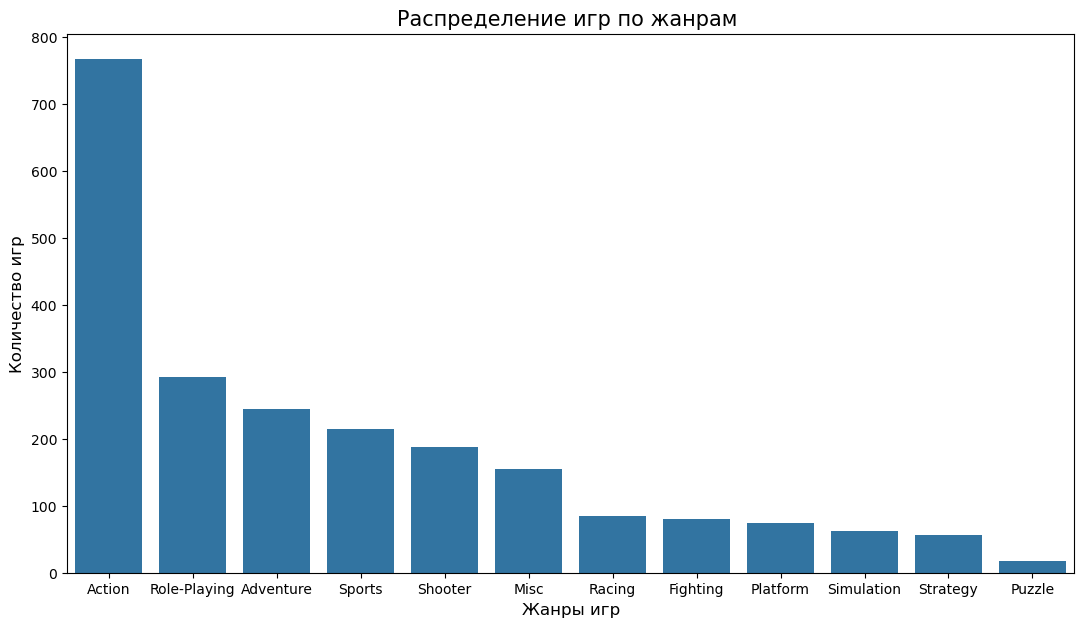

In [47]:
# Отрисуем барплот чтобы наглядно посмотреть какие жанры лидирует, а какие остаются внизу
plt.figure(figsize=(13,7))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=distr_genre, x='genre', y='name')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Количество игр',fontsize=12)

#### Вывод:
С заметным отрывом от остальных по количеству игр в жанре лидирует жанр Action (766 игр). Количество игр сильно отличается, поэтому необходимо посчитать медианные продажи по каждому жанру, чтобы понять какой жанр в общем продается лучше!

### Медианные продажи игр по жанрам

In [48]:
#С помощью сводных таблиц выведем жанры и их медианны продажам. Применим сортировку по убыванию. 
distr_genre = df[(df['year_of_release'] >= 2013)].pivot_table(
    index='genre', values='sum_sales', aggfunc='median').sort_values(by='sum_sales', ascending=False)
distr_genre = distr_genre.reset_index().rename_axis(None, axis=1)
distr_genre

,genre,sum_sales
0,Shooter,0.45
1,Sports,0.24
2,Platform,0.22
3,Role-Playing,0.12
4,Fighting,0.12
5,Racing,0.12
6,Action,0.11
7,Simulation,0.10
8,Misc,0.10
9,Strategy,0.08


Text(0, 0.5, 'Медианные продажи')

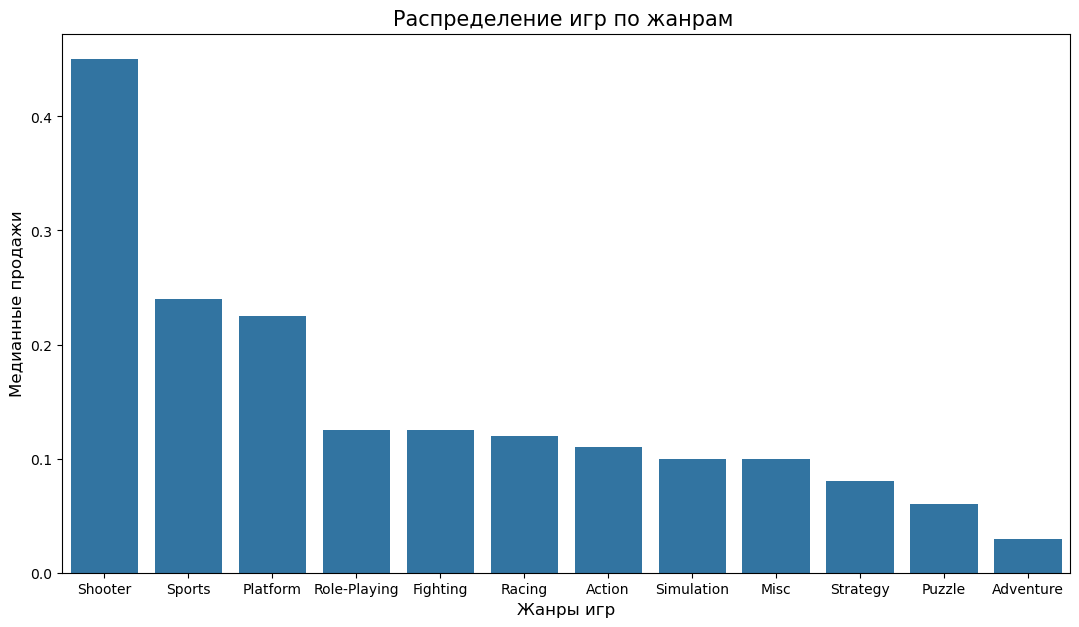

In [49]:
#Отрисуем барплот чтобы наглядно посмотреть какие жанры лидирует, а какие остаются внизу
plt.figure(figsize=(13,7))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=distr_genre, x='genre', y='sum_sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Медианные продажи',fontsize=12)

#### Вывод: 
Посмотрев на график и таблицу с медианными продажами, можно с увереностью сказать, что все заметно изменилось. Например, жанр Action, который был топ 1 по сумме продаж из-за своего количества игр, теперь по медианным продажам уступает 6 жанрам, аналогично картина изменилась и для других. В итоге мы видим, что теперь топ 1 жанр Shooter!

# Шаг 4. Создание портрета пользователя каждого региона

- Определим для пользователя каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5). Опишем различия в долях продаж.
    - Самые популярные жанры (топ-5). Поясним разницу.
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [50]:
#Напишем функции для создания сводных таблиц и отрисовки барплотов
#Функция для создания сводбных таблиц за весь период
def forpivot(row, title):
    fig, axes = plt.subplots(1, 3, figsize=(21, 5))
    for pivot, ax in zip(list(['platform','genre','rating']),axes.flatten()[:3]):
        ppivot = df.pivot_table(index=pivot, values=row, aggfunc='sum'
                  ).sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        print(ppivot)
        print('\n\n') 
        sns.set_palette("Blues")
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)
        

plt.show()
sns.set()

#Функция для создания сводных таблиц за последние 3 года
def pivot_3_years_last(row, title):
    temp = df[df['year_of_release']>=2013]
    fig, axes = plt.subplots(1, 3, figsize=(21, 5))
    for pivot, ax in zip(list(['platform','genre','rating']), axes.flatten()[:3]):
        ppivot = temp.pivot_table(index=pivot, values=row, aggfunc='sum').sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        print(ppivot)
        print('\n\n')
        sns.set_palette("BuGn_r")
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)

## Портрет пользователя North America

  platform  na_sales
0     X360    602.47
1      PS2    583.84
2      Wii    496.90
3      PS3    393.49
4       DS    382.40



      genre  na_sales
0    Action    879.01
1    Sports    684.43
2   Shooter    592.24
3  Platform    445.50
4      Misc    407.27



      rating  na_sales
0          E  1,292.99
1  undefined  1,242.46
2          T    759.75
3          M    748.48
4       E10+    353.32





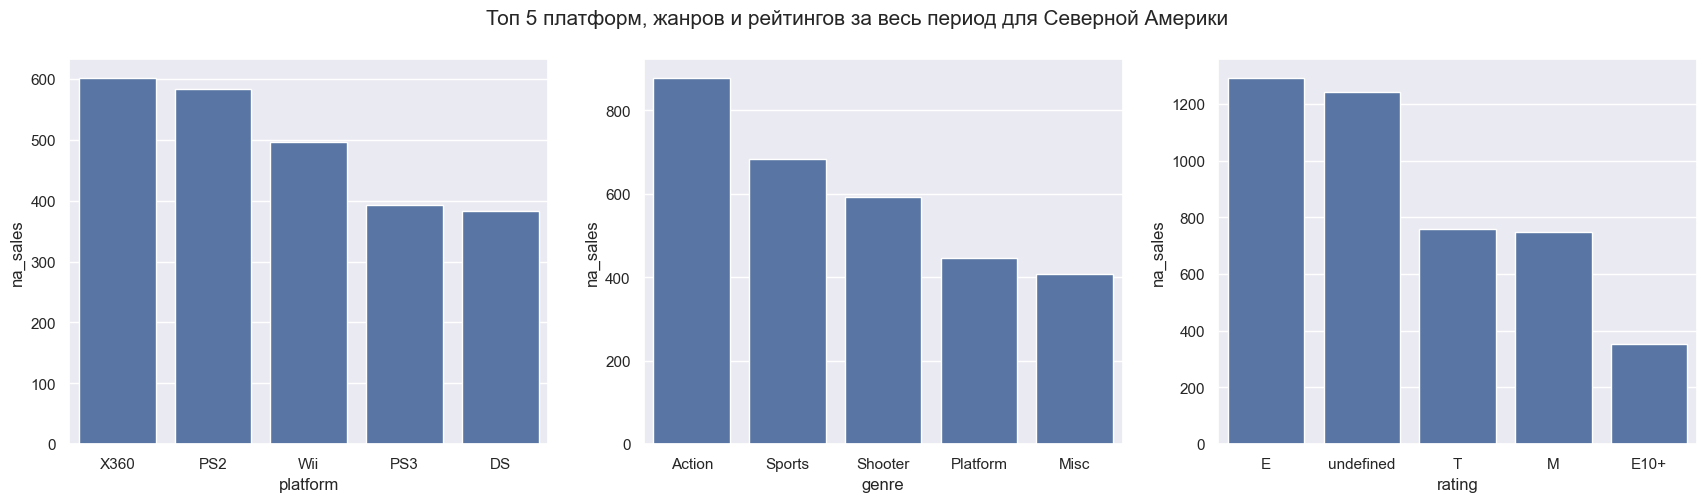

In [51]:
#Выведем топ 5 платформ, жанров и рейтингов за весь период
forpivot('na_sales','Топ 5 платформ, жанров и рейтингов за весь период для Северной Америки')

### Вывод:
Топ 5 жанров в северной америке за все время: Action, Sports, Shooter, Platform, Misc
По рейтингам видно, что больше всего продаж за все время у игр с рейтингом E (для всех), на втором месте игры с рейтингом undefined (Без рейтинга), на третьем месте игры с рейтингом T (от 13 и выше)

  platform  na_sales
0      PS4    108.74
1     XOne     93.12
2     X360     81.66
3      PS3     63.50
4      3DS     38.20



          genre  na_sales
0        Action    126.05
1       Shooter    109.74
2        Sports     65.27
3  Role-Playing     46.40
4          Misc     27.49



      rating  na_sales
0          M    165.21
1  undefined     89.42
2          E     79.05
3       E10+     54.24
4          T     49.79





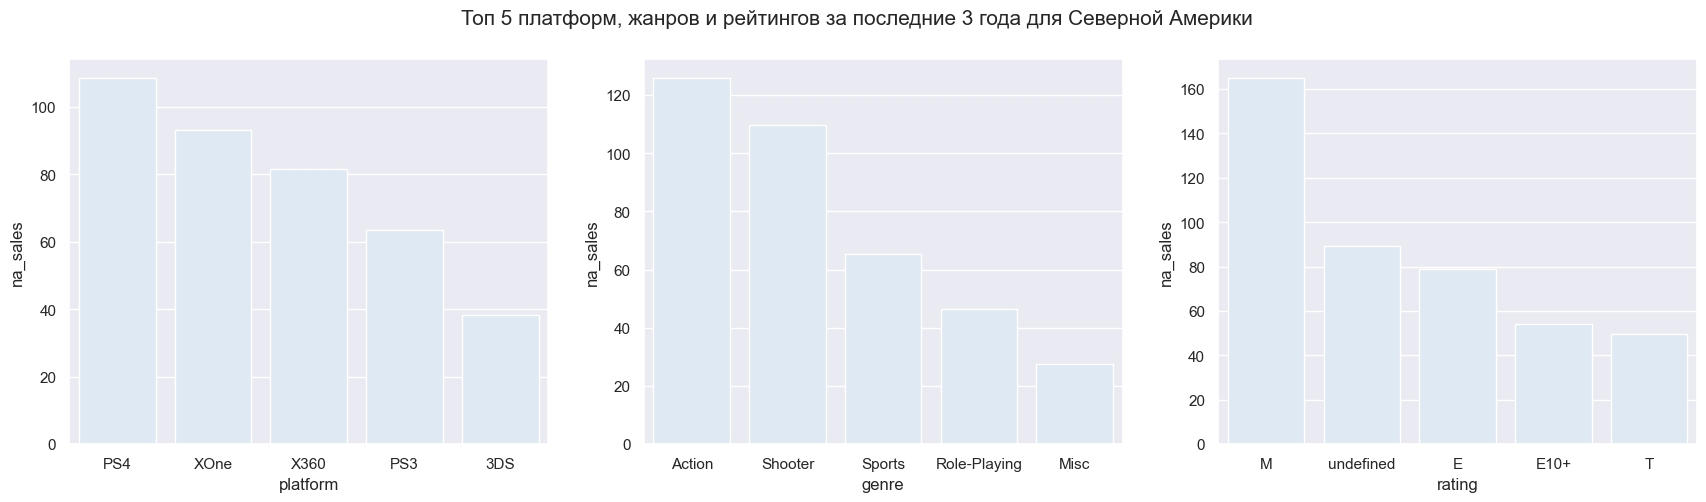

In [52]:
#Выведем топ 5 платформ, жанров и рейтингов за последние 3 года
pivot_3_years_last('na_sales','Топ 5 платформ, жанров и рейтингов за последние 3 года для Северной Америки')

### Вывод:
Если посмотреть с 2013 по 2016 года, то мы видим как интерес меняется:
Топ игровых приставок выглядит таким образом : PS4, XOne, X360, PS3
Топ жанров игр: Action, Shooter, Sports 
Топ рейтингов игр : "От 17 и выше", undefined (Без рейтинга), "Для всех", "От 13 и выше"

## Портрет пользователя European Union

  platform  eu_sales
0      PS2    339.29
1      PS3    330.29
2     X360    270.76
3      Wii    262.21
4       PS    213.61



     genre  eu_sales
0   Action    519.13
1   Sports    376.79
2  Shooter    317.34
3   Racing    236.51
4     Misc    212.74



      rating  eu_sales
0          E    710.25
1  undefined    613.83
2          M    483.97
3          T    427.03
4       E10+    188.52





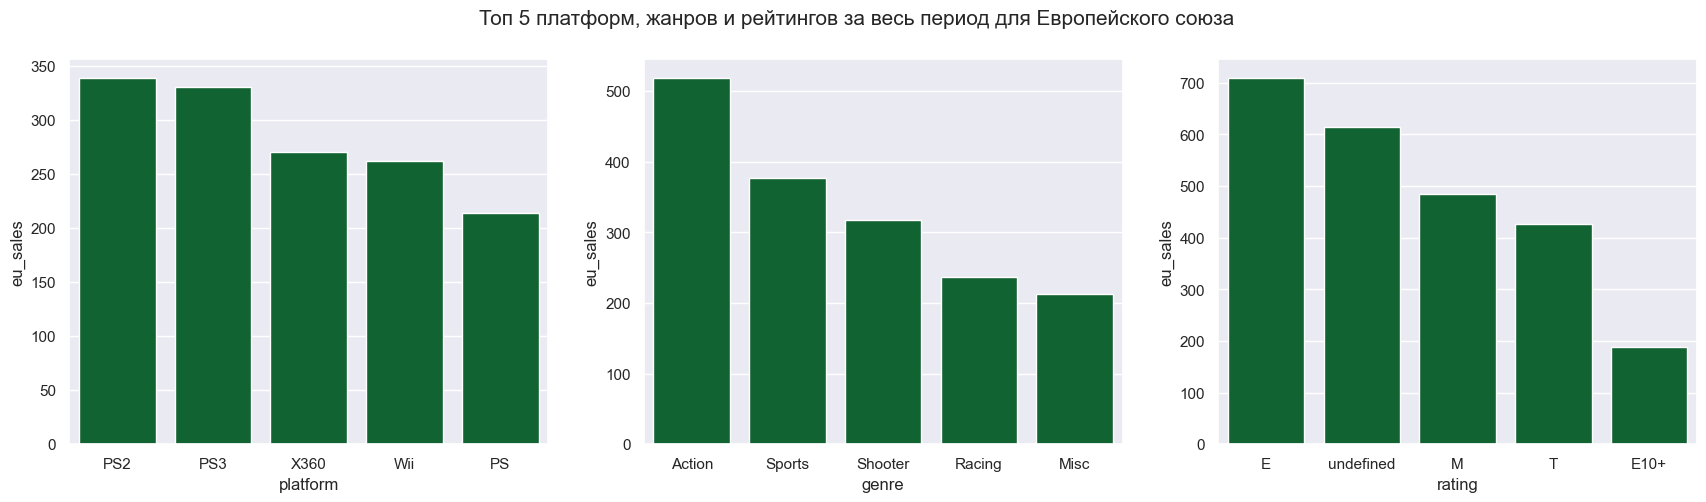

In [53]:
#Выведем топ 5 платформ, жанров и рейтингов за весь период для Европейского союза
forpivot('eu_sales','Топ 5 платформ, жанров и рейтингов за весь период для Европейского союза')

### Вывод:
Самые популярные игровые платформы за весь период в Европе это: PS2, PS3, X360, WII, PS
Топ 5 жанров в Европе : Action, Sports, Shooter, Racing, Misc
По рейтингам видно, что больше всего продаж у игр с рейтингом E (для всех), на втором месте игры с рейтингом undefined(без рейтинга), и на третьем месте игры с рейтингом M (от 17 и выше)

  platform  eu_sales
0      PS4    141.09
1      PS3     67.81
2     XOne     51.59
3     X360     42.52
4      3DS     30.96



          genre  eu_sales
0        Action    118.13
1       Shooter     87.86
2        Sports     60.52
3  Role-Playing     36.97
4        Racing     20.19



      rating  eu_sales
0          M    145.32
1          E     83.36
2  undefined     78.91
3       E10+     42.69
4          T     41.95





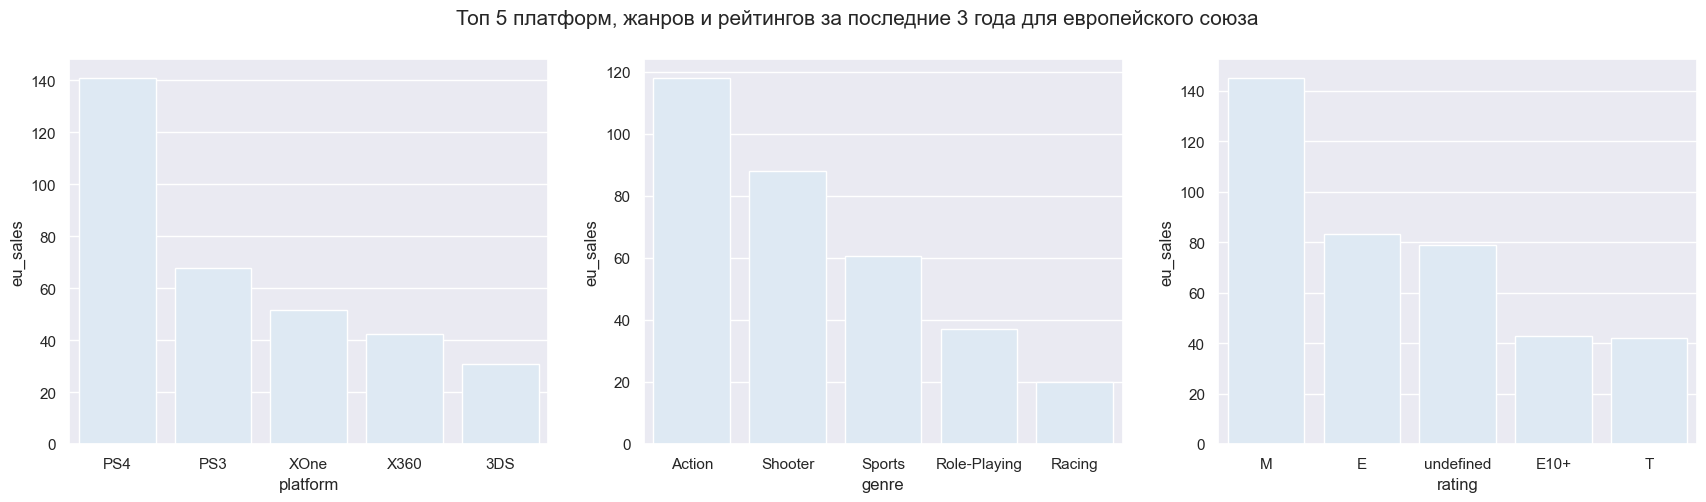

In [54]:
#Выведем топ 5 платформ, жанров и рейтингов за последние 3 года для Европейского Союза
pivot_3_years_last('eu_sales','Топ 5 платформ, жанров и рейтингов за последние 3 года для европейского союза')

### Вывод:
За последние 3 года интерес у пользователя кардинально изменился:
Топ платформ: PS4, PS3, XOne, X360, 3DS
Топ жанров стал: Action, Shooter, Sports, Role-Playing
Топ рейтингов: M (От 17 и выше), E (Для всех), undefined (Без рейтинга), E10+ (от 10 и выше), T ( от 13 и выше)

## Портрет пользователя Japanese

  platform  jp_sales
0       DS    175.57
1       PS    139.82
2      PS2    139.20
3     SNES    116.55
4      3DS    100.67



          genre  jp_sales
0  Role-Playing    355.41
1        Action    161.43
2        Sports    135.54
3      Platform    130.83
4          Misc    108.11



      rating  jp_sales
0  undefined    841.96
1          E    198.11
2          T    151.40
3          M     64.24
4       E10+     40.20





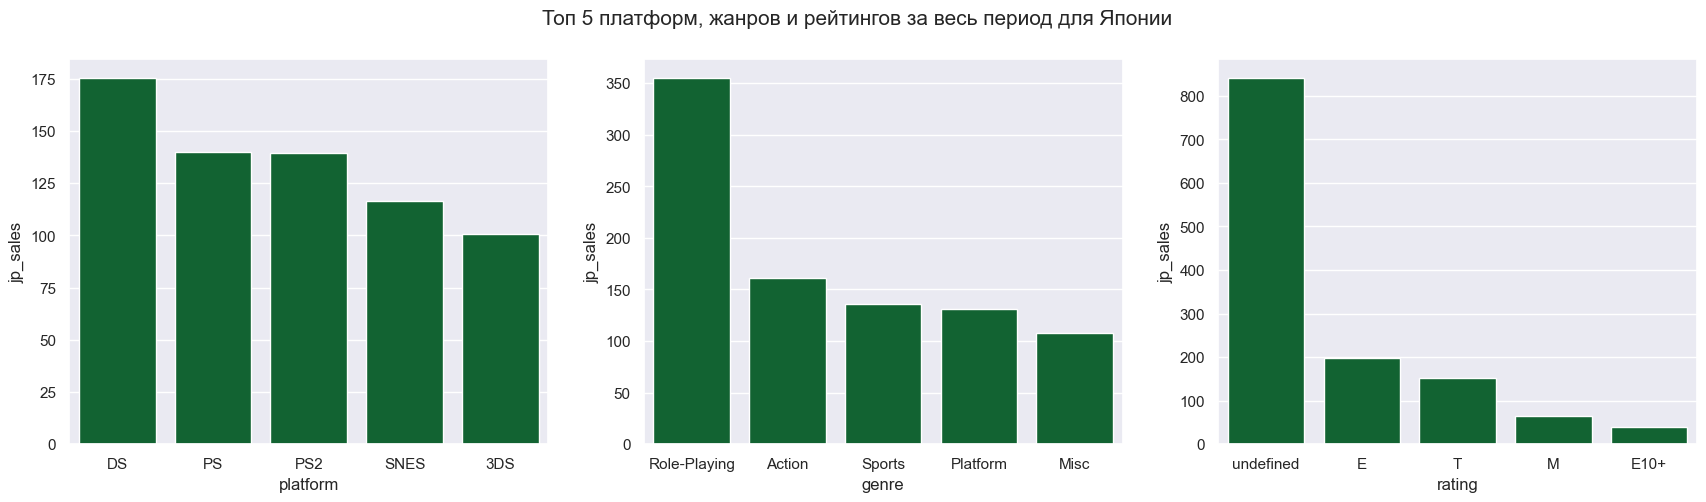

In [55]:
#Выведем топ 5 платформ, жанров и рейтингов за весь период для Японии
forpivot('jp_sales','Топ 5 платформ, жанров и рейтингов за весь период для Японии')

### Вывод:
Самые популярные игровые платформы в Японии это: DS, PS, PS2, SNES, 3DS
Топ 5 жанров в Японии : Role-Playing, Action, Sports, Platform, Misc
По рейтингам видно, что больше всего продаж у игр с рейтингом undefined (Без рейтинга),на втором месте игры с рейтингом "для всех", на третьем месте игры с рейтингом "от 13 и выше"

  platform  jp_sales
0      3DS     67.81
1      PS3     23.35
2      PSV     18.59
3      PS4     15.96
4     WiiU     10.88



          genre  jp_sales
0  Role-Playing     51.04
1        Action     40.49
2          Misc      9.20
3      Fighting      7.65
4       Shooter      6.61



      rating  jp_sales
0  undefined     85.05
1          T     20.59
2          E     15.14
3          M     14.11
4       E10+      5.89





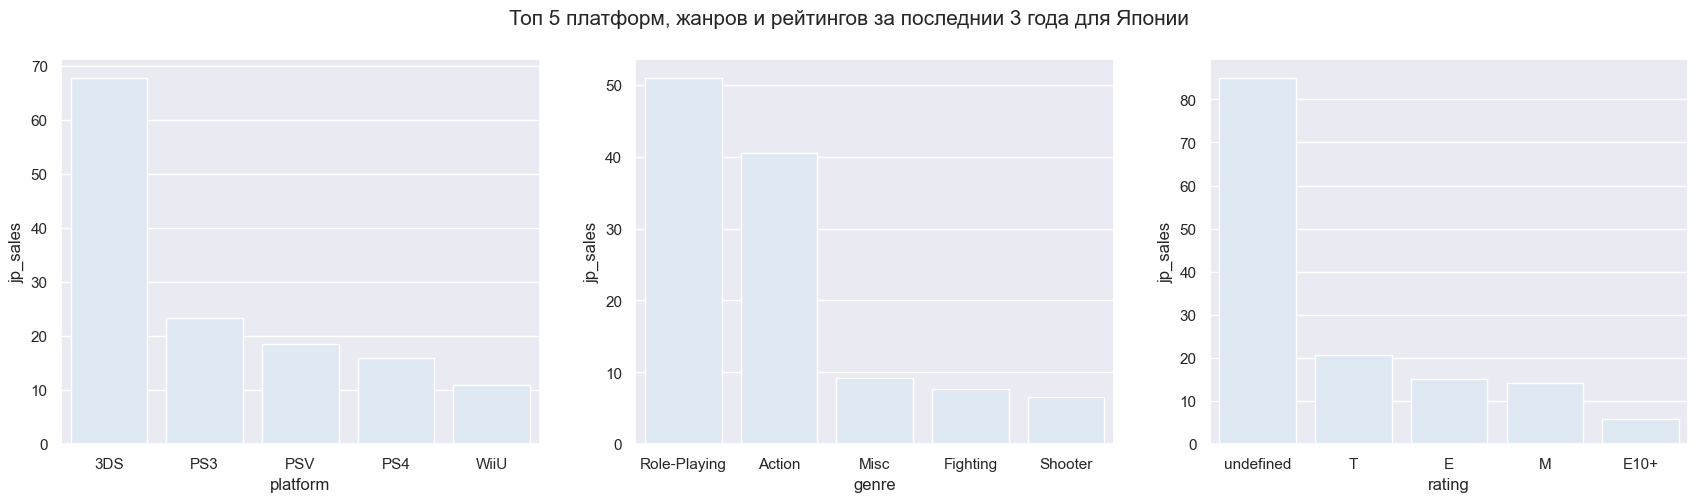

In [56]:
#Выведем топ 5 платформ, жанров и рейтингов за последние 3 года для Японии
pivot_3_years_last('jp_sales','Топ 5 платформ, жанров и рейтингов за последнии 3 года для Японии')

### Вывод:
За последние 3 года интерес у пользователя изменился только по предпочтению платформ:
Топ платформ: 3DS, PS3, PSV, PS4,WiiU
Топ Жанров: Role-Playing, Action, Misc
Топ рейтингов: undefined (Без рейтинга), "от 13 и выше", "для всех" и "от 17 и выше"  

## Вывод по составлению портрета пользователя каждого региона

Топ 5 жанров в северной америке за все время: Action, Sports, Shooter, Platform, Misc
По рейтингам видно, что больше всего продаж за все время у игр с рейтингом E (для всех), на втором месте игры с рейтингом undefined (Без рейтинга), на третьем месте игры с рейтингом T (от 13 и выше)

Самые популярные игровые платформы за весь период в Европе это: PS2, PS3, X360, WII, PS
Топ 5 жанров в Европе : Action, Sports, Shooter, Racing, Misc
По рейтингам видно, что больше всего продаж у игр с рейтингом E (для всех), на втором месте игры с рейтингом undefined(без рейтинга), и на третьем месте игры с рейтингом M (от 17 и выше)

Самые популярные игровые платформы в Японии это: DS, PS, PS2, SNES, 3DS
Топ 5 жанров в Японии : Role-Playing, Action, Sports, Platform, Misc
По рейтингам видно, что больше всего продаж у игр с рейтингом undefined (Без рейтинга),на втором месте игры с рейтингом "для всех", на третьем месте игры с рейтингом "от 13 и выше"


Если брать данные за последние 3 года:
В Северной Америке:
Топ игровых приставок выглядит таким образом : PS4, XOne, X360, PS3
Топ жанров игр: Action, Shooter, Sports 
Топ рейтингов игр : "От 17 и выше", undefined (Без рейтинга), "Для всех", "От 13 и выше"

В Европейском союзе:
Топ платформ: PS4, PS3, XOne, X360, 3DS
Топ жанров стал: Action, Shooter, Sports, Role-Playing
Топ рейтингов: M (От 17 и выше), E (Для всех), undefined (Без рейтинга), E10+ (от 10 и выше), T ( от 13 и выше)

В Японии:
Топ платформ: 3DS, PS3, PSV, PS4,WiiU
Топ Жанров: Role-Playing, Action, Misc
Топ рейтингов: undefined (Без рейтинга), "от 13 и выше", "для всех" и "от 17 и выше"  

Для прогноза будущих продаж лучше брать данные за последние 3 года, так как технологии и потребительский спрос меняются с очень быстрыми темпами, и вкусы людей также могут меняться очень быстро. Соответственно:, для 2017 года большую часть прибыли будут приносить игры:
* В Северной Америке: жанр Action на приставке PS4 "От 17 и выше"
* В Европейском союзе: жанр Action на приставке PS4 "От 17 и выше"
* В Японии: жанр Role-Playing на приставке 3DS "undefined" (Без рейтинга)

# Шаг 5. Проверка гипотез

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и 
Sports (англ. «спортивные соревнования») разные.
- Пороговое значение alpha зададим самостоятельно.
- Поясним:
    - Как мы сформулировали нулевую и альтернативную гипотезы;
    - Какой критерий применили для проверки гипотез и почему.

## Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Сформулируем нулевую гипотезу:

Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [57]:
# Сохраним в переменных xone и pc соответствующие данные (актуальные данные за последние 3 года)
xone = df[(df['platform']=='XOne') & (df['year_of_release']>=2013)]['user_score']
pc = df[(df['platform']=='PC') & (df['year_of_release']>=2013)]['user_score']

#Посчитаем средний рейтинг пользователя для Xbox One платформ
xone.mean()

6.521428571428572

In [58]:
#Посчитаем средний рейтинг пользователя для PC платформ
pc.mean()

6.269677419354839

In [59]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = .01

results = st.ttest_ind(xone.dropna(), pc.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


### Вывод: 
Полученное значение p-value говорит о том, что с вероятностью, более 14% различие средних рейтингов платформы  Xbox One и PC можно получить случайно. Это слишком большая вероятность, чтобы делать вывод о значимом различии между средним рейтингом на платформе Xbox One и средним рейтингом PC. Поэтому средний рейтинг пользователей Xbox One не отличается от среднего рейтинга PC.

## Средние пользовательские рейтинги жанров Action (англ. «действие», экшенигры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем нулевую гипотезу:

Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые
Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются


In [60]:
# Сохраним в переменных genre_action_hyp и genre_sports_hyp соответствующие данные с пользовательскими оценками
genre_action = df[(df['genre']=='Action') & (df['year_of_release']>=2013)]['user_score']
genre_sports = df[(df['genre']=='Sports') & (df['year_of_release']>=2013)]['user_score']

#выведем среднюю оценку по жанру экшн
genre_action.mean()

6.837532133676093

In [61]:
#выведем среднюю оценку по жанру спорт
genre_sports.mean()

5.238124999999999

In [62]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = .01

results = st.ttest_ind(genre_action.dropna(), genre_sports.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


### Вывод: 
Среднии рейтинги пользователей жанров «Action» и «Sports» дейтсвительно различаются - наша гипотеза подтвердилась. Об этом говорит почти Нулевая(H₀) вероятность. Случайно получить такое отличие в значениях практически не возможно.

## Вывод по проверке гипотез

Проверили гипотезы по ТЗ:

- Гипотеза: "Средние пользовательские рейтинги платформ Xbox one и PC одинаковые". Нулевую гипотезу не удалось опровергнуть.
- Гипотеза: "Средние пользовательские рейтинги жанров Action и Sports разные". Отвергаем нулевую гипотезу.

# Шаг 6. Общий вывод

* Во время анализа данных было произведено изучение и знакомство с данными и произведена предобработка данных.
Определили, что аббревиатура TBD значит to be determined, to be done. То есть данные были нарочно не заполнены. Поэтому заменили tbd на nan для проведения дальнейшего анализа
* Во время исследовательского анализа данных выявили, что до 1992 года количество выпускаемых игр практически не изменялось. Начиная с 1993 до 2009 года наблюдается динамика роста выпускаемых игр. После 2009 происходит спад и уровень выпуска возвращается к 2001 году - это может быть связано с улучшением качества игр (возрастает бюджет и время на разработку игр), ещё может влиять популяризации игр на телефоне. Стало известно, что у всех платформ есть период жизни судя по топ 5 платформ за весь период в среднем 10 лет и есть период активного роста в среднем 3-4 года. После проведения исследовательского анализа за актуальный период мы посчитали 3 последнии года (2013-2016) и в дальнейшем анализе использовали именно данный период. Стало известно, что оценка пользователей слабо влияет на продажи, в некоторых случаях вообще не влияет, чего не скажешь о оценке критиков. Пользователи больше доверяют отзывам критиков и чаще отдают предпочтении именно мнению критиков! Лидируют по сумме продаж жанры Action и Shooter. Однако, по мединным продажам Наибольшей популярностью обладают жанры Shooter и Sports, данная метрика была применина из-за большого различия по количеству игр в каждом жанре! Большинство жанров имеют небольшой спрос по сравнению с лидерами продаж!
* В итоге мы получили за последнии 3 года лидируют такие платформы как: 'PS4','PS3','XOne','3DS','X360'. За данный период наибольшая сумма продаж PS4 за ним идут PS3 и XOne

Создание портрета пользователя каждого региона для 2017 года большую часть прибыли будут приносить игры:
* В Северной Америке: жанр Action на приставке PS4 "От 17 и выше"
* В Европейском союзе: жанр Action на приставке PS4 "От 17 и выше"
* В Японии: жанр Role-Playing на приставке 3DS "от 13 и выше"


Проверили гипотезы по ТЗ:

- Гипотеза: "Средние пользовательские рейтинги платформ Xbox one и PC одинаковые". Нулевую гипотезу не удалось опровергнуть.
- Гипотеза: "Средние пользовательские рейтинги жанров Action и Sports разные". Отвергаем нулевую гипотезу.

# Оптимизация хранения данных 

Мы будем часто выяснять то, сколько памяти используется, поэтому создадим функцию, которая поможет нам сэкономить немного времени.

In [63]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # исходим из предположения о том, что если это не DataFrame, то это Series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # преобразуем байты в мегабайты
    return "{:03.2f} MB".format(usage_mb)

## Оптимизация хранения числовых данных с использованием подтипов

Функцию pd.to_numeric() можно использовать для нисходящего преобразования числовых типов. Для выбора целочисленных столбцов воспользуемся методом DataFrame.select_dtypes(), затем оптимизируем их и сравним использование памяти до и после оптимизации.

In [64]:
df_int = df.select_dtypes(include=['int'])
converted_int = df_int.apply(pd.to_numeric,downcast='unsigned')
# проверяем на сколько удалось снизить потребление памяти
print(mem_usage(df_int))
print(mem_usage(converted_int))

0.06 MB
0.03 MB


In [65]:
df_float = df.select_dtypes(include=['float'])
converted_float = df_float.apply(pd.to_numeric,downcast='float')
# проверяем на сколько удалось снизить потребление памяти
print(mem_usage(df_float))
print(mem_usage(converted_float))

0.89 MB
0.45 MB


## Оптимизация хранения данных объектных типов с использованием категориальных переменных

Для того чтобы понять, где именно мы сможем воспользоваться категориальными данными для снижения потребления памяти, выясним количество уникальных значений в столбцах, хранящих значения объектных типов:

In [66]:
df_obj = df.select_dtypes(include=['object']).copy()
df_obj.describe()

,name,platform,genre,rating
count,16713,16715,16713,16715
unique,11559,31,12,9
top,Need for Speed: Most Wanted,PS2,Action,undefined
freq,12,2161,3369,6766


Нам стоит ограничить использование типа category, в столбцах, хранящих данные типа object, в которых уникальными являются менее 50% значений. Если все значения в столбце уникальны, то использование типа category приведёт к повышению уровня использования памяти.

Создадим цикл, который перебирает все столбцы, хранящие данные типа object, выясняет, не превышает ли число уникальных значений в столбцах 50%, и если это так, преобразует их в тип category.

In [67]:
converted_obj = pd.DataFrame()

for col in df_obj.columns:
    num_unique_values = len(df_obj[col].unique())
    num_total_values = len(df_obj[col])
    if num_unique_values / num_total_values < 0.5:
        converted_obj.loc[:,col] = df_obj[col].astype('category')
    else:
        converted_obj.loc[:,col] = df_obj[col]

In [68]:
# проверяем на сколько удалось снизить потребление памяти
print(mem_usage(df_obj))
print(mem_usage(converted_obj))

3.74 MB
1.22 MB
